https://gluon-cv.mxnet.io/build/examples_detection/demo_ssd.html#sphx-glr-build-examples-detection-demo-ssd-py

In [1]:
from gluoncv import model_zoo, data, utils
from matplotlib import pyplot as plt

Let’s get an SSD model trained with 512x512 images on Pascal VOC dataset with ResNet-50 V1 as the base model. By specifying pretrained=True, it will automatically download the model from the [model zoo](https://gluon-cv.mxnet.io/model_zoo/index.html) if necessary. 

In [2]:
net = model_zoo.get_model('ssd_512_resnet50_v1_voc', pretrained=True)

/Users/robin/anaconda3/lib/python3.7/site-packages/mxnet/gluon/block.py:1159: UserWarning: Cannot decide type for the following arguments. Consider providing them as input:
	data: None
  input_sym_arg_type = in_param.infer_type()[0]


Model file is not found. Downloading.


100%|██████████| 132723/132723 [00:52<00:00, 2514.79KB/s]


Next we download an image, and pre-process with preset data transforms. Here we specify that we resize the short edge of the image to 512 px. 

In [3]:
im_fname = utils.download('https://github.com/dmlc/web-data/blob/master/' +
                          'gluoncv/detection/street_small.jpg?raw=true',
                          path='street_small.jpg')
x, img = data.transforms.presets.ssd.load_test(im_fname, short=512)
print('Shape of pre-processed image:', x.shape)

117KB [00:00, 2359.87KB/s]             

Shape of pre-processed image: (1, 3, 512, 512)


The forward function will return all detected bounding boxes, and the corresponding predicted class IDs and confidence scores. Their shapes are (batch_size, num_bboxes, 1), (batch_size, num_bboxes, 1), and (batch_size, num_bboxes, 4), respectively.

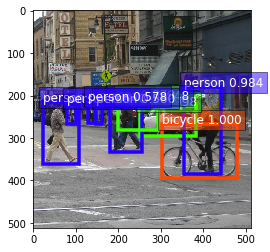

In [4]:
class_IDs, scores, bounding_boxes = net(x)

ax = utils.viz.plot_bbox(img, bounding_boxes[0], scores[0],
                         class_IDs[0], class_names=net.classes)
plt.show()